<a href="https://colab.research.google.com/github/Dhenuka45/AI-ML/blob/main/Project_Spam_Mail_Detectoripynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/spam.csv', encoding='latin-1')
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df = df.rename(columns={'v1':'label','v2':'text'})

In [3]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score,confusion_matrix,classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
sn=SnowballStemmer('english')
stop=set(stopwords.words('english'))


**Cleaning up the Dataset**

In [5]:
def clean_text(sms):
  sms=sms.lower()
  sms=re.sub('[^a-z0-9]',' ',sms)      #To remove all the additional characters
  sms=sms.split()
  sms=[k for k in sms if len(k)>1]     #To reduce dimensionality
  sms=[sn.stem(word) for word in sms if word not in stop]  #Removing stop words from data
  sms=' '.join(sms)
  return sms

In [6]:
df['clean_text']=df['text'].apply(clean_text)
df.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi great world l...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


**Initialising X and y**

In [7]:
cv=CountVectorizer(max_features=5000)
X=cv.fit_transform(df['clean_text']).toarray()

In [8]:
y=pd.get_dummies(df['label']).astype(int)
y=y['spam'].values

**Splitting into Training and Testing data**

In [9]:
X_train, X_Test, y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

**Applying Multinomial Naive Bayes**

In [10]:
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [11]:
y_pred=model.predict(X_Test)

**EVALUATION**

In [12]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[942,   7],
       [  9, 157]])

In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       949
           1       0.96      0.95      0.95       166

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [14]:
f1_score(y_test,y_pred)

0.9515151515151515

**Visualization**

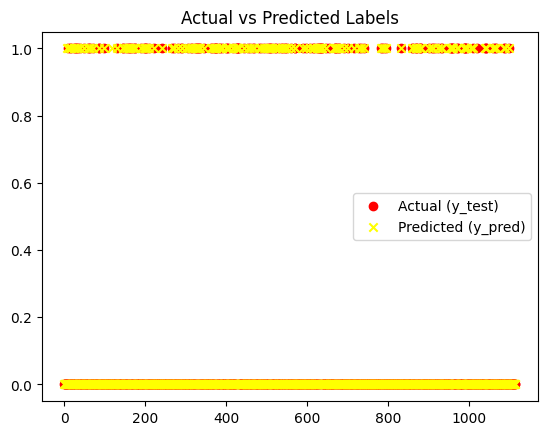

In [15]:
plt.scatter(range(len(y_test)), y_test, label='Actual (y_test)', color='red',marker='o')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted (y_pred)', color='yellow',marker='x')
plt.title('Actual vs Predicted Labels')
plt.legend()
plt.show()